In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from tqdm import tqdm
from rapidfuzz import fuzz

from helpers import *

import warnings

# Ignoring warnings to improve code readability
warnings.filterwarnings("ignore")

# Resetting Matplotlib default settings
plt.rcdefaults()

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 20)

%load_ext autoreload
%autoreload 2

# Setting the paths to the data folders
DATA_FOLDER = "../Data/"

In [70]:
actors_load = pd.read_csv(
    DATA_FOLDER + "actors.csv",
    converters={
        "fbID": parse_list_actors,
        "ageAtMovieRelease": parse_string,
        "category": parse_string,
        "winner": parse_string,
    },
)
movies_load = pd.read_csv(
    DATA_FOLDER + "movies.csv",
    converters={
        "languages": parse_string,
        "countries": parse_string,
        "genres": parse_string
    },
)

In [73]:
# No need for the other notebook
actors_load['numMovies'] = actors_load['fbID'].apply(lambda x: len(x))
actors_load['actorDOB'] = pd.to_datetime(actors_load['actorDOB'], errors='coerce', utc=True)
actors_load['yearOfBirth'] = actors_load['actorDOB'].dt.year

In [74]:
actors_oscars = actors_load.dropna(subset=['category'])
print("Number of actors nominated for an oscar:", actors_oscars.shape[0])
n_winners = sum(actors_oscars['winner'].apply(lambda x: sum(list(x.values())) if sum(list(x.values())) == True else 0))
print("Number of actors that won an oscar:", n_winners)

pct_winners = n_winners / actors_oscars.shape[0] * 100
print(f"Percentage of actors that won an oscar between nominated actors: {pct_winners:.2f}%")


Number of actors nominated for an oscar: 825
Number of actors that won an oscar: 235
Percentage of actors that won an oscar between nominated actors: 28.48%


In [82]:
unique_categories = set([category for categories in actors_oscars['category'] for category in categories.values()])
for category in unique_categories:
    print(f"Number of actors nominated for {category}: {actors_oscars['category'].apply(pd.Series).stack().value_counts()[category]}")

# Faire joli graphe de genre de Val for this

Number of actors nominated for MUSIC (Original Score): 1
Number of actors nominated for ANIMATED FEATURE FILM: 7
Number of actors nominated for WRITING (Screenplay Based on Material Previously Produced or Published): 2
Number of actors nominated for ACTOR IN A SUPPORTING ROLE: 344
Number of actors nominated for ACTRESS: 197
Number of actors nominated for WRITING (Story and Screenplay--written directly for the screen): 1
Number of actors nominated for MUSIC (Original Song Score): 2
Number of actors nominated for MUSIC (Adaptation Score): 1
Number of actors nominated for ACTRESS IN A SUPPORTING ROLE: 344
Number of actors nominated for WRITING (Original Motion Picture Story): 1
Number of actors nominated for ACTOR: 198
Number of actors nominated for DOCUMENTARY (Short Subject): 1
Number of actors nominated for SHORT FILM (Animated): 2
Number of actors nominated for ACTRESS IN A LEADING ROLE: 174
Number of actors nominated for MUSIC (Scoring): 1
Number of actors nominated for WRITING (Scre

In [76]:
# Count the number of female actors that were nominated for an oscar
n_female = actors_oscars[actors_oscars['actorGender'] == 'F'].shape[0]

# Calculate the percentage of female actors that were nominated for an oscar
pct_female = n_female / actors_oscars.shape[0] * 100

print(f"Percentage of female actors nominated for an oscar: {pct_female:.2f}%")

# Count the number of female actors that won an oscar
n_female_winners = sum(actors_oscars[actors_oscars.actorGender == 'F']['winner'].apply(lambda x: sum(list(x.values())) if sum(list(x.values())) == True else 0))

# Calculate the percentage of female actors that won an oscar
pct_female_winners = n_female_winners/n_winners * 100

print(f"Percentage of female actors that won an oscar: {pct_female_winners:.2f}%")

Percentage of female actors nominated for an oscar: 48.00%
Percentage of female actors that won an oscar: 47.23%


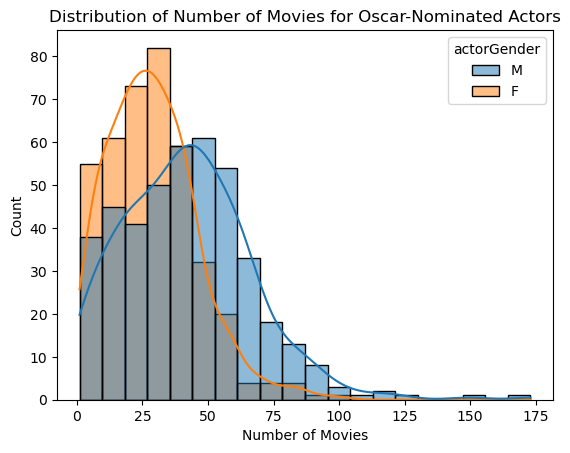

In [77]:
sns.histplot(data=actors_oscars, x='numMovies', bins=20, kde=True, hue = 'actorGender')
plt.title('Distribution of Number of Movies for Oscar-Nominated Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Count')
plt.show()

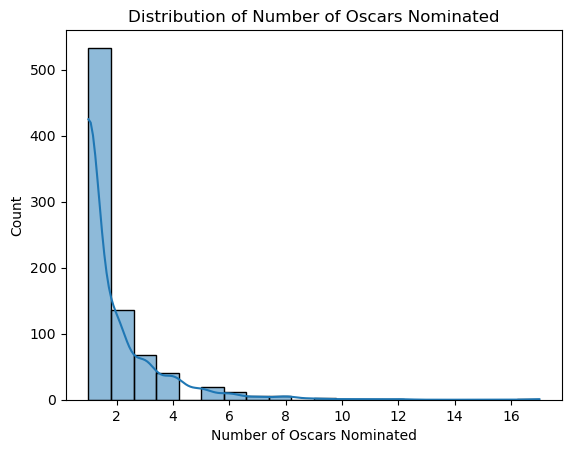

In [89]:
actors_oscars['numOscarsNominated'] = actors_oscars['category'].apply(lambda x: len(list(x.values())))

sns.histplot(data=actors_oscars, x='numOscarsNominated', bins=20, kde=True)
plt.title('Distribution of Number of Oscars Nominated')
plt.xlabel('Number of Oscars Nominated')
plt.ylabel('Count')
plt.show()

Interesting factors to study:
- Age of the actors at the time of the movie release has an impact on the probability of being nominated for an oscar
- Number of movies before being nominated for oscar
- Budget of the movie
- Mean rating of movies before being nominated for an Oscar
- Start age of career
- Most current genre for Oscars
- Are these factors different by gender

